In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset

df = pd.read_csv("D:/ML_Project/ml.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,18318661,Romeo,464,Austrelia,Female,34,4,202388.20,4,1,0,64339.87,0
1,2,75804843,Gerasimov,645,India,Female,30,2,10418.25,1,1,0,158364.88,1
2,3,18752486,Kay,676,China,Female,43,3,90185.31,2,0,1,16071.67,1
3,4,35153662,Jackson,650,USA,Male,23,1,228938.17,1,1,0,138163.15,1
4,5,32159796,Martinez,768,Austrelia,Female,25,7,170946.92,3,1,0,210431.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,57668068,Azikiwe,457,Spain,Male,60,10,117389.52,1,0,0,111161.26,1
29996,29997,99693067,Bearce,307,USA,Male,40,2,190170.01,1,0,0,119173.33,0
29997,29998,89022498,Anderson,791,China,Male,37,10,101442.38,2,0,0,81950.64,0
29998,29999,24911241,Odinakachukwu,619,America,Female,76,3,146576.48,1,0,0,159398.01,0


In [32]:
# 2. Handle Missing Values

print("Dataset preview: ")
print(df.head())

Dataset preview: 
   RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0          1    18318661      Romeo          464  Austrelia  Female   34   
1          2    75804843  Gerasimov          645      India  Female   30   
2          3    18752486        Kay          676      China  Female   43   
3          4    35153662    Jackson          650        USA    Male   23   
4          5    32159796   Martinez          768  Austrelia  Female   25   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       4  202388.20              4          1               0   
1       2   10418.25              1          1               0   
2       3   90185.31              2          0               1   
3       1  228938.17              1          1               0   
4       7  170946.92              3          1               0   

   EstimatedSalary  Exited  
0         64339.87       0  
1        158364.88       1  
2         16071.67       1  
3        138

In [33]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [34]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [35]:
print("\n numeric columns: ")
print(num_cols)


 numeric columns: 
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [36]:
print("\n categorical columns: ")
print(cat_cols)


 categorical columns: 
['Surname', 'Geography', 'Gender']


In [37]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [38]:
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [39]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [40]:
# 3. Encode Categorical

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [41]:
# 4. Choose Target Column

if "Exited" in df.columns:
    target = "Exited"
else:
    # fallback: last column ko target maan lo
    target = df.columns[-1]

print("🎯 Target Selected:", target)

🎯 Target Selected: Exited


In [42]:
X = df.drop(columns=[target])
y = df[target]

In [43]:
# 5. Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns again
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove target column if present
if "Exited" in num_cols:
    num_cols.remove("Exited")

# Apply scaling
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [44]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [45]:
#Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Naive Bayes": GaussianNB()
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    results[name] = acc
    
    print("\n===============================")
    print(f"🔹 {name}")
    print("Accuracy:", acc, "%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


🔹 Logistic Regression
Accuracy: 49.97 %
Confusion Matrix:
 [[2525 1993]
 [2510 1972]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.56      0.53      4518
         1.0       0.50      0.44      0.47      4482

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000


🔹 KNN
Accuracy: 50.53 %
Confusion Matrix:
 [[2320 2198]
 [2254 2228]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.51      0.51      4518
         1.0       0.50      0.50      0.50      4482

    accuracy                           0.51      9000
   macro avg       0.51      0.51      0.51      9000
weighted avg       0.51      0.51      0.51      9000


🔹 Decision Tree
Accuracy: 49.06 %
Confusion Matrix:
 [[2231 2287]
 [2298 2184]]
Classification Report:
               precision    recall  

C:\Users\hp\AppData\Local\Temp\ipykernel_9192\1425707290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


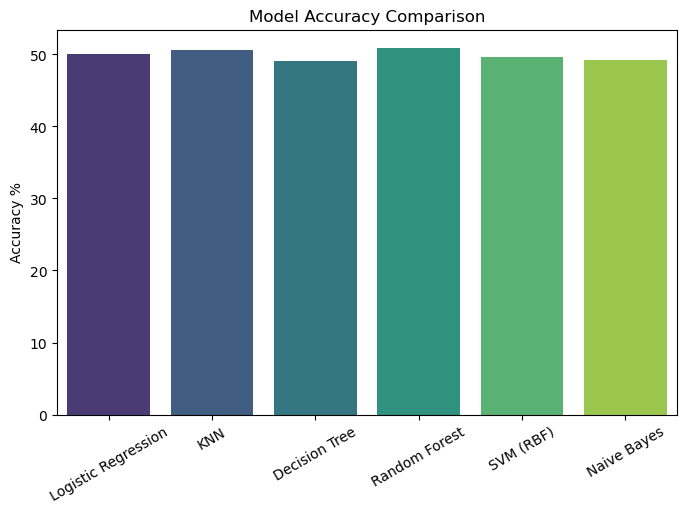

In [53]:
#Accuracy Comparison Plot
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy %")
plt.xticks(rotation=30)
plt.show()

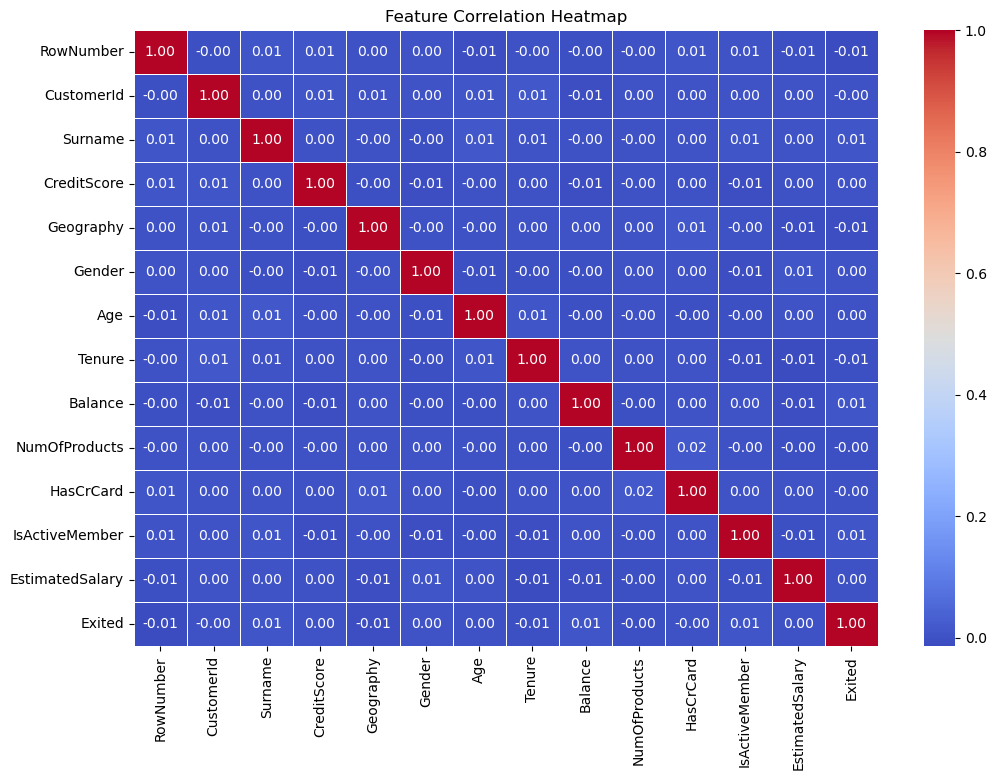

In [54]:
#Feature Corelation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show(block=False)

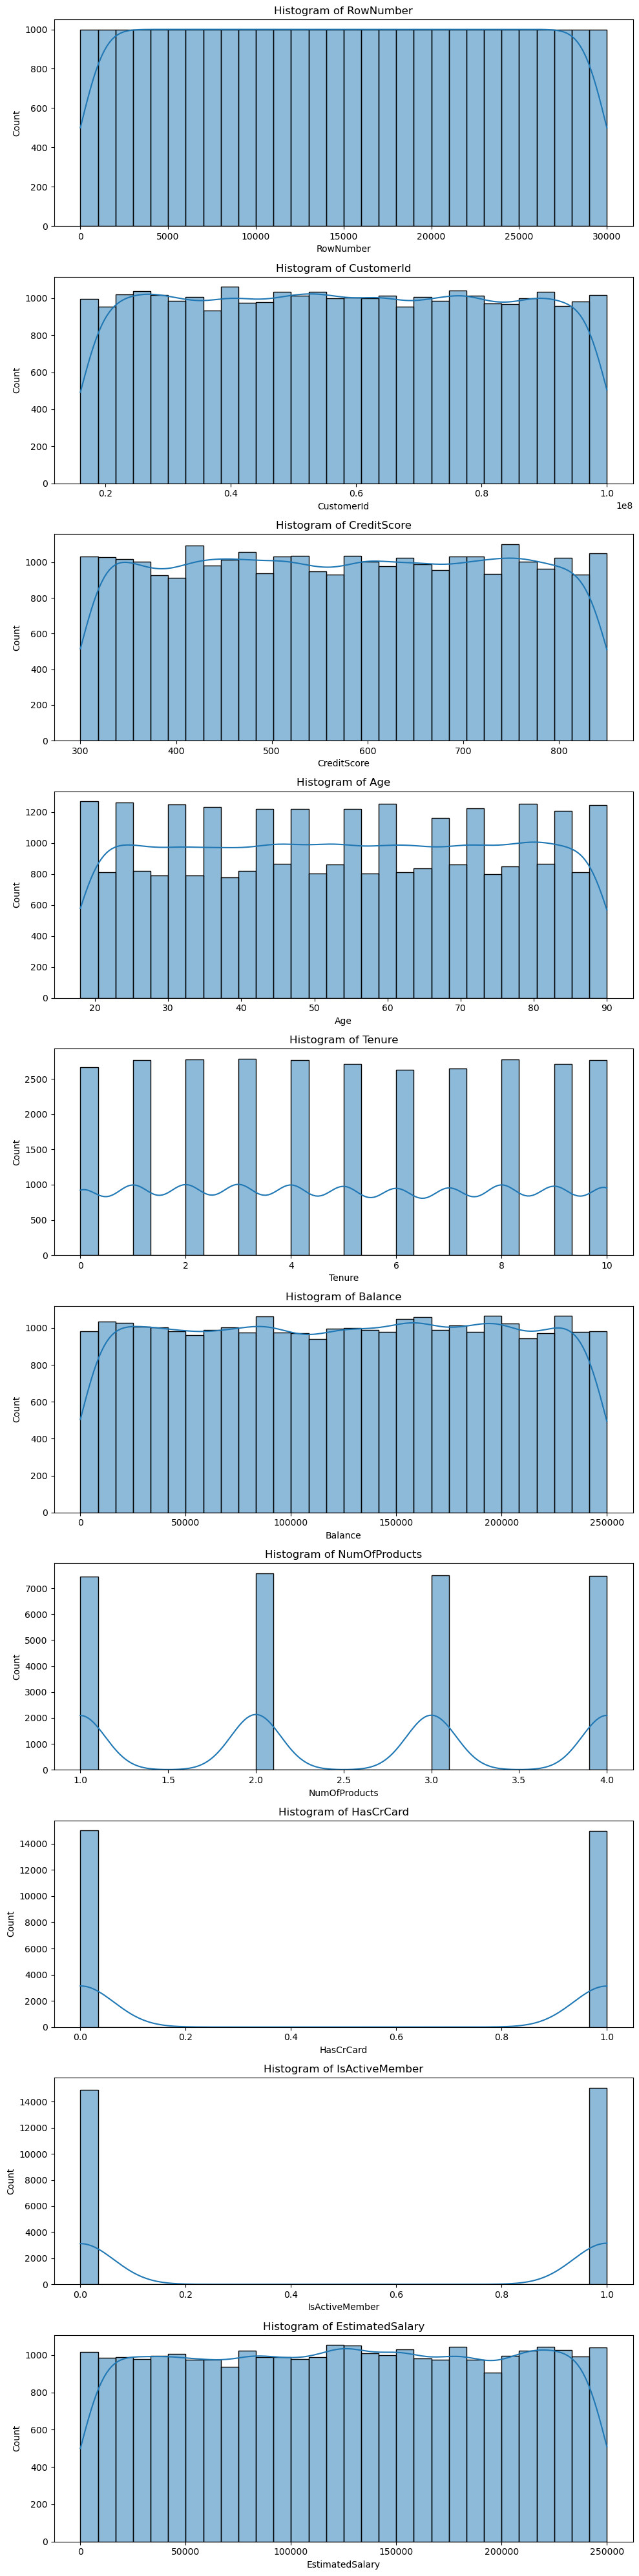

In [55]:
# 🔹 Histogram for all numerical columns dynamically
fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

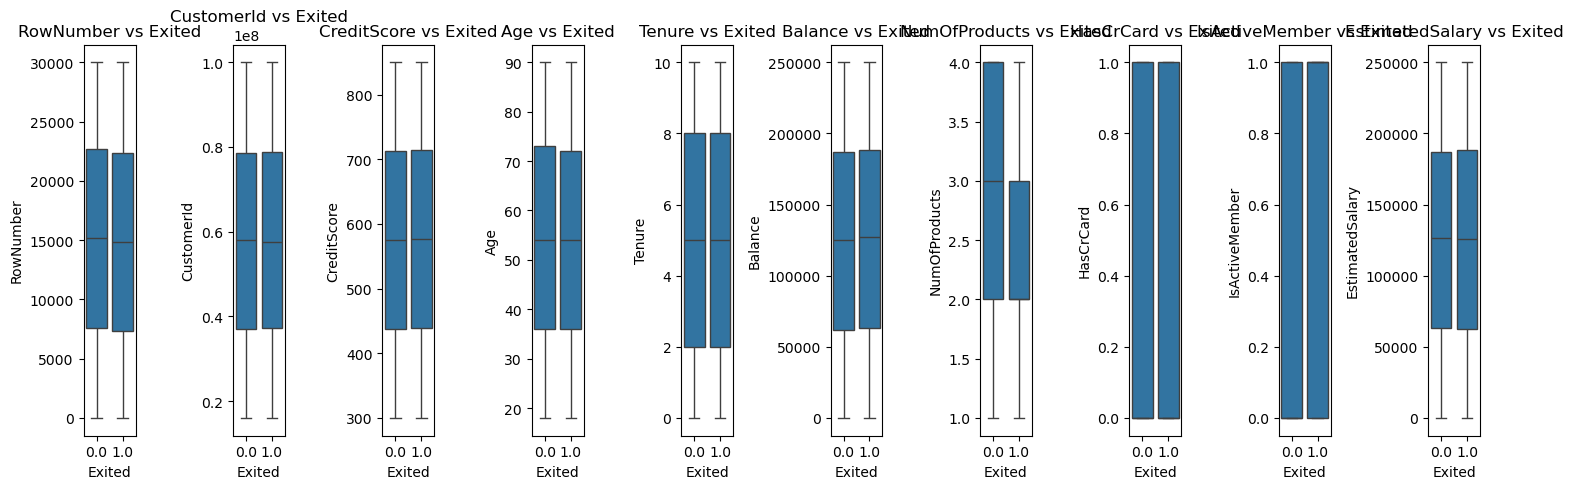

In [56]:
#Box Plot
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(x=y, y=df[col], ax=axes[i])
    axes[i].set_title(f"{col} vs {target}")
plt.tight_layout()
plt.show()

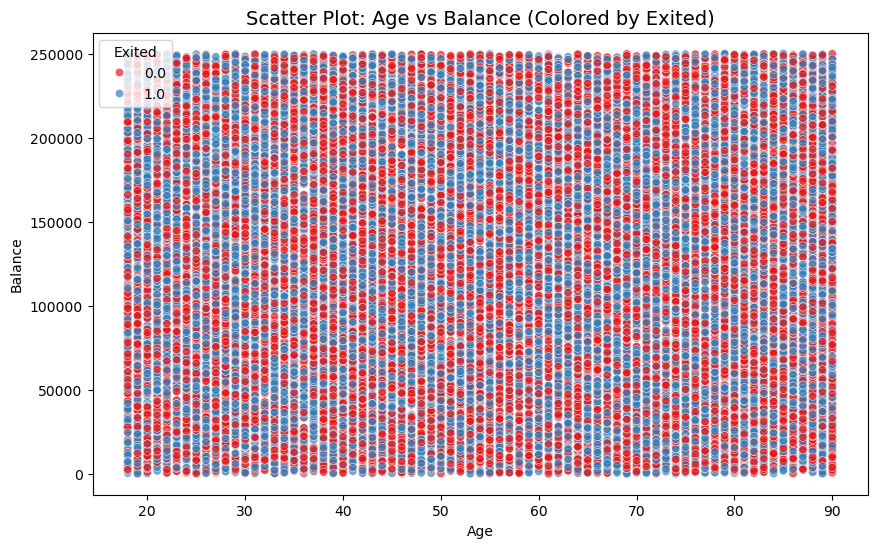

In [57]:
#Scatter Graph
if "Age" in df.columns and "Balance" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df["Age"], y=df["Balance"], hue=df["Exited"], palette="Set1", alpha=0.7)
    plt.title("Scatter Plot: Age vs Balance (Colored by Exited)", fontsize=14)
    plt.show()

In [20]:

new_data = pd.DataFrame([{
    "CreditScore": 650,
    "Geography": "France",
    "Gender": "Male",
    "Age": 40,
    "Tenure": 5,
    "Balance": 60000.0,
    "NumOfProducts": 2,
    "HasCrCard": 1,    "IsActiveMember": 1,
    "EstimatedSalary": 50000.0
}])

pred_class = model.predict(new_data)[0]
print("Here is prediction value from our sample data ")
print("Predicted Exited:", pred_class)



Here is prediction value from our sample data 
Predicted Exited: 0
